A1. Find the first derivative of your speech signal with finite
difference method. Listen to the first
derivative signal and the original speech signal.

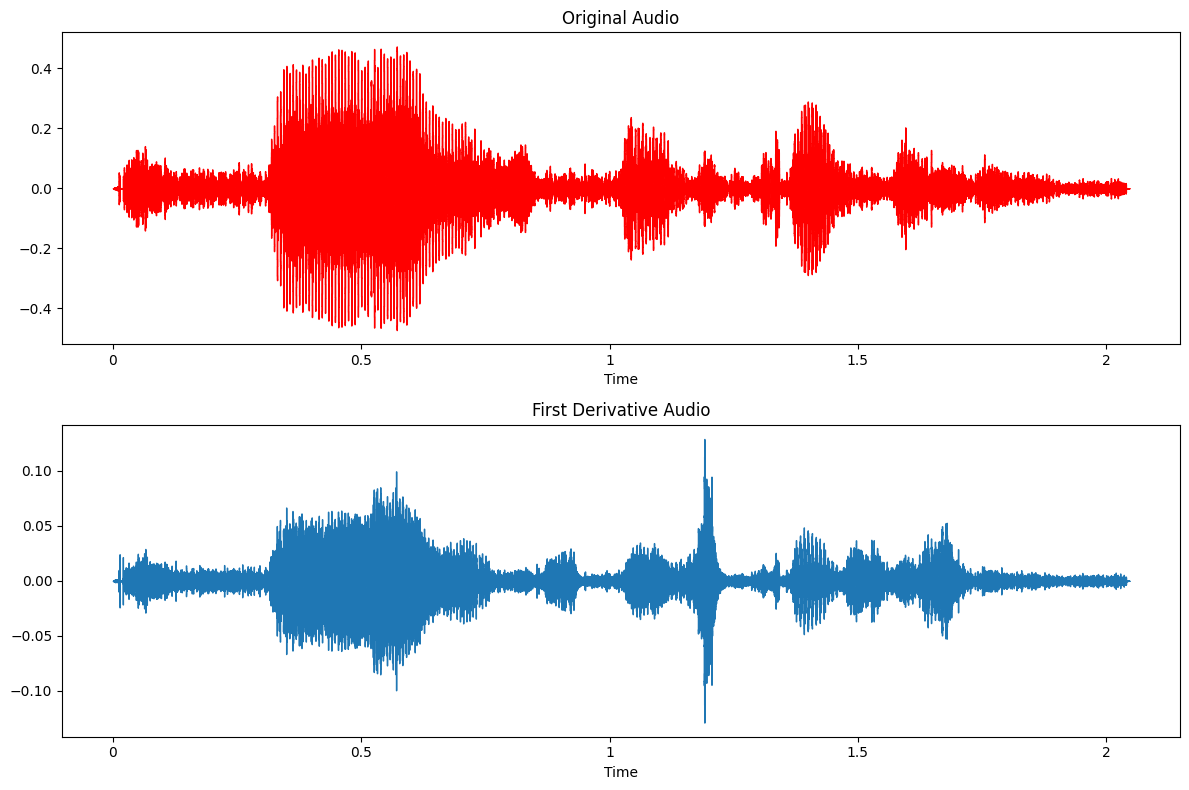

In [21]:
#A1
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt


file = 'audio.wav'
y, sr = librosa.load(file)
derivative = np.diff(y)
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y, sr=sr, color = 'r')
plt.title('Original Audio')
plt.subplot(2, 1, 2)
librosa.display.waveshow(derivative, sr=sr )
plt.title('First Derivative Audio')
plt.tight_layout()
plt.show()



 A2 Detect the points of zero crossing in the first derivative signal. Compare the average length
between two consecutive zero crossings for speech and silence regions. Observe the pattern.

Average Length between Zero Crossings (Speech): 2000.7142857142858
Average Length between Zero Crossings (Silence): 5.187514371119797


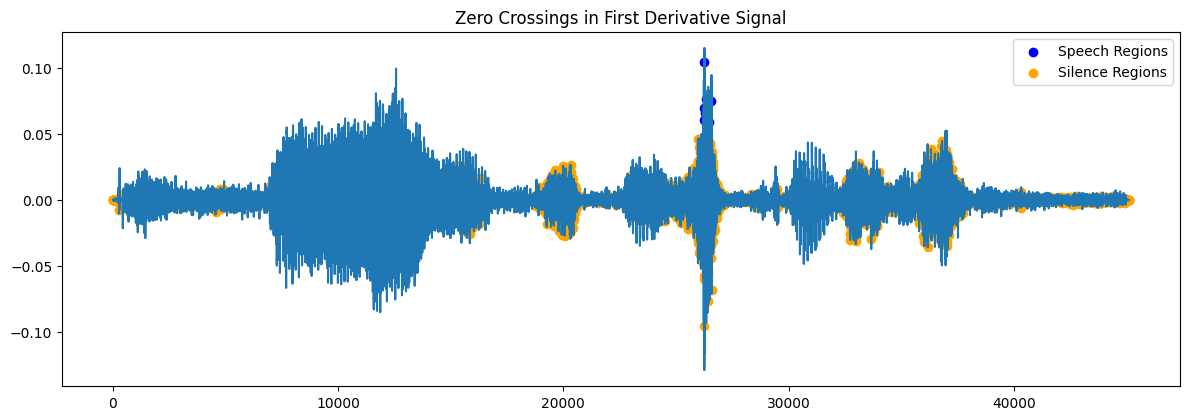

In [29]:
threshold = 0.05
zero_crossings = np.where(np.diff(np.sign(derivative)))[0]
speech_regions = zero_crossings[derivative[zero_crossings] > threshold]
silence_regions = zero_crossings[derivative[zero_crossings] <= threshold]

average_length_speech = np.mean(np.diff(speech_regions))
average_length_silence = np.mean(np.diff(silence_regions))

print(f'Average Length between Zero Crossings (Speech): {average_length_speech}')
print(f'Average Length between Zero Crossings (Silence): {average_length_silence}')

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(derivative)
plt.scatter(speech_regions, derivative[speech_regions], c='b', label='Speech Regions')
plt.scatter(silence_regions, derivative[silence_regions], c='orange', label='Silence Regions')
plt.title('Zero Crossings in First Derivative Signal')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
pip install pydub

A3 Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths of
your spoken words with those of your project team-mate.

In [34]:
myaudio = 'audio2.wav'
teammateaudio= 'Lab2_voice.wav'

#duration
myduration = get_audio_duration(myaudio)
teammateduration = get_audio_duration(teammateaudio)

#lengths
print(f'my audio: {myduration:.2f} seconds')
print(f'Teammate audio: {teammateduration:.2f} seconds')
if myduration > teammateduration:
    print('my spoken words are longer.')
elif myduration < teammateduration:
    print('team-mate spoken words are longer.')
else:
    print('The durations are the same.')


my audio: 3.84 seconds
Teammate audio: 3.74 seconds
my spoken words are longer.


A4  Select a sentence which can be used for making a statement or asking a question. Ex: “You are
going to college on Sunday(./?)”. Record two signals – one with making the statement while other
with asking question. Study the two signals and compare them.

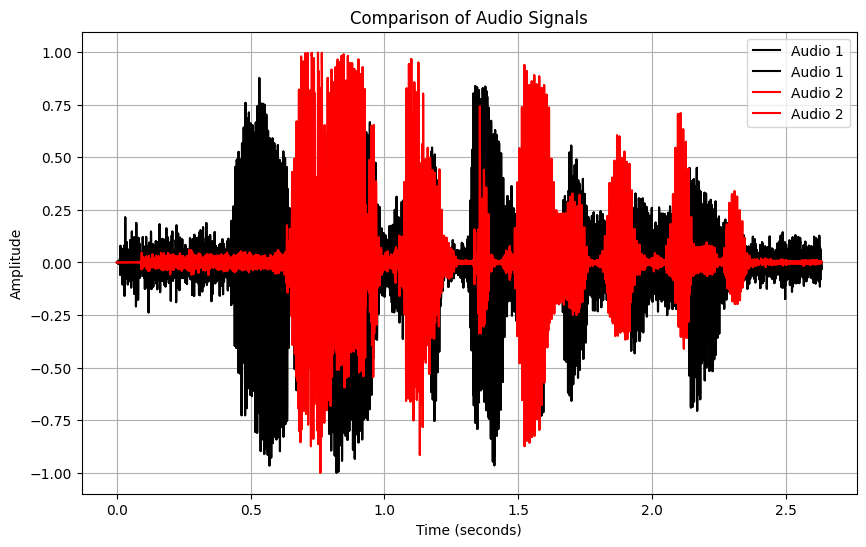

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate_1, audio_data_1 = wavfile.read("audio3.wav")
sample_rate_2, audio_data_2 = wavfile.read("Lab2.4_voice.wav")

min_length = min(len(audio_data_1), len(audio_data_2))
audio_data_1 = audio_data_1[:min_length]
audio_data_2 = audio_data_2[:min_length]

if sample_rate_1 != sample_rate_2:
    raise ValueError("Sample rates of the audio files do not match.")

audio_data_1 = audio_data_1.astype(float) / np.max(np.abs(audio_data_1))
audio_data_2 = audio_data_2.astype(float) / np.max(np.abs(audio_data_2))

time_axis = np.arange(len(audio_data_1)) / sample_rate_1

plt.figure(figsize=(10, 6))
plt.plot(time_axis, audio_data_1, color='black', label='Audio 1')
plt.plot(time_axis, audio_data_2, color='red', label='Audio 2')
plt.title('Comparison of Audio Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()